In [1]:
tag_to_name = {
    'rainbow:v1': 'Baseline',
    'custom:v12': 'AllAveragePRB',
    'custom:v13': 'BufferAveragePRB',
    'custom:v14': 'MinimumPRB',
    'custom:v15': 'StochasticMaxPRB',
    'custom:v16': 'CombinedAveragePRB',
    'custom:v17': 'DoubleSampling',
    'custom:v18': 'BufferExponentialAveragePRB',
    'custom:v19': 'StochasticMaxDeltaPRB',
    'custom:v20': 'MinimumDeletionPRB',
    'custom:v21': 'NoDueling',
    'custom:v22': 'URB',
    'custom:v23': 'ShortTermMemoryPRB',
    'custom:v24': 'StochasticMaxURB',
    'custom:v25': 'FullBufferStochasticMaxPRB',
    'custom:v26': 'StochasticBufferAveragePRB',
    'custom:v27': 'StochasticDeletionPRB',
#     'custom:v28': 'LearningRateDecay',
    'custom:v29': 'NoMinBuffer',
    'custom:v30': 'WeightChangeDeletionPRB',
}
name_to_tag = {v: k for k, v in tag_to_name.items()}

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_agents():
    """
    Get set of agents contained in info.txt.
    """
    agent_set = set([])

    with open('info.txt', 'r') as file:
        lines = file.readlines()

    for line in lines:
        words = line.split('|')
        words = [word.strip() for word in words]

        agent_tag = words[1]
        if agent_tag not in agent_set:
            agent_set.add(tag_to_name[agent_tag])

    return agent_set

In [4]:
def get_data(agent_name, task=None):
    """
    Return tuple (xs, ys) where xs is the progress and ys is the score given
    agent and task. If task is not specified, return average score.
    """
    agent_tag = name_to_tag[agent_name]
    x = []
    y = []

    with open('info.txt', 'r') as file:
        lines = file.readlines()

    for line in lines:
        indiv_status = [''] * 5
        indiv_progress = [''] * 5
        indiv_score = [''] * 5

        words = line.split('|')
        words = [word.strip() for word in words]

        date, agent, status, score = words[0:4]

        for i in range(5):
            _, indiv_status[i], indiv_progress[i], indiv_score[i] = words[4*i+4:4*i+8]

        if agent == agent_tag:
            if not task:
                sum_progress = 0
                sum_count = 0
                for progress in indiv_progress:
                    if progress not in ['N/A', '']:
                        sum_progress += float(progress[:-1])
                        sum_count += 1
                if sum_count > 0:
                    x.append(sum_progress / sum_count if sum_count > 0 else 0)
                    y.append(float(score))
            else:
                if indiv_progress[task - 1] not in ['N/A', ''] and indiv_score[task - 1] != 'pending':
                    x.append(float(indiv_progress[task - 1][:-1]))
                    y.append(float(indiv_score[task - 1]))

    return x, y

In [5]:
def plot_scores(agent_name, show=True, filename=None):
    """
    Plots average score and task scores for given agent. Shows file if
    show=True. Saves file if filename is specified.
    """
    xs, ys = get_data(agent_name)
    xs1, ys1 = get_data(agent_name, 1)
    xs2, ys2 = get_data(agent_name, 2)
    xs3, ys3 = get_data(agent_name, 3)
    xs4, ys4 = get_data(agent_name, 4)
    xs5, ys5 = get_data(agent_name, 5)
    plt.plot(xs, ys, 'k', linewidth=4)
    plt.plot(xs1, ys1)
    plt.plot(xs2, ys2)
    plt.plot(xs3, ys3)
    plt.plot(xs4, ys4)
    plt.plot(xs5, ys5)
    plt.legend(['Average', 'Task #1', 'Task #2', 'Task #3', 'Task #4', 'Task #5'])
    plt.xlabel('Progress (%)')
    plt.xlim([0, 100])
    plt.ylabel('Score')
    plt.ylim([0, 10000])
    plt.title(agent_name)
    
    if filename:
        plt.savefig(filename)
    if show:
        plt.show()
    else:
        plt.close()

In [6]:
def get_delta(list_):
    """
    Returns list of deltas of a given list. The list is prepended with 0 to
    match length with the original list.
    """
    deltas = [0]
    for i, elem in enumerate(list_):
        if i == len(list_)-1:
            break
        deltas.append(list_[i+1] - elem)
    
    return deltas

In [7]:
def plot_delta_scores(agent_name, show=True, filename=None):
    """
    Plots deltas of average score and task scores for given agent. Shows file
    if show=True. Saves file if filename is specified.
    """
    xs, ys = get_data(agent_name)
    xs1, ys1 = get_data(agent_name, 1)
    xs2, ys2 = get_data(agent_name, 2)
    xs3, ys3 = get_data(agent_name, 3)
    xs4, ys4 = get_data(agent_name, 4)
    xs5, ys5 = get_data(agent_name, 5)
    ys = get_delta(ys)
    ys1 = get_delta(ys1)
    ys2 = get_delta(ys2)
    ys3 = get_delta(ys3)
    ys4 = get_delta(ys4)
    ys5 = get_delta(ys5)
    plt.plot(xs, ys, 'k', linewidth=4)
    plt.plot(xs1, ys1)
    plt.plot(xs2, ys2)
    plt.plot(xs3, ys3)
    plt.plot(xs4, ys4)
    plt.plot(xs5, ys5)
    plt.legend(['Average', 'Task #1', 'Task #2', 'Task #3', 'Task #4', 'Task #5'])
    plt.xlabel('Progress (%)')
    plt.xlim([0, 100])
    plt.ylabel('$\\Delta$ Score')
    plt.ylim([-200, 200])
    plt.title(agent_name)

    if filename:
        plt.savefig(filename)
    if show:
        plt.show()
    else:
        plt.close()

In [8]:
def compare_scores(agents, task=None):
    """
    Plots average score of all given agents. If task is specified, plots the
    scores for that particular task.
    """
    for agent in agents:
        xs, ys = get_data(agent, task)
        plt.plot(xs, ys)

    plt.xlabel('Progress (%)')
    plt.xlim([0, 100])
    plt.ylabel('Score')
    plt.ylim([0, 10000])

    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(agents, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [9]:
def compare_delta_scores(agents, task=None):
    """
    Plots deltas of average score of all given agents. If task is specified,
    plots the deltas for that particular task.
    """
    for agent in agents:
        xs, ys = get_data(agent, task)
        ys = get_delta(ys)
        plt.plot(xs, ys)

    plt.xlabel('Progress (%)')
    plt.xlim([0, 100])
    plt.ylabel('$\\Delta$ Score')
    plt.ylim([-200, 200])
    
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(agents, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

# Plots

In [10]:
for agent_name in tag_to_name.values():
    plot_scores(agent_name, show=False, filename='writeup/{}.png'.format(agent_name))
    plot_delta_scores(agent_name, show=False, filename='writeup/{}_delta.png'.format(agent_name))

/home/rlee/anaconda3/envs/paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


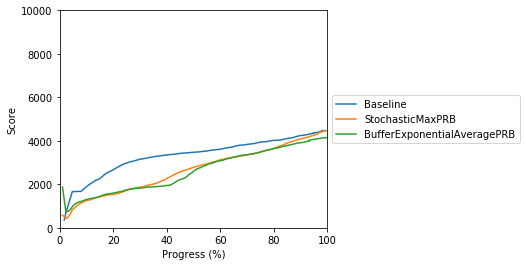

In [11]:
compare_scores(['Baseline', 'StochasticMaxPRB', 'BufferExponentialAveragePRB'])

/home/rlee/anaconda3/envs/paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


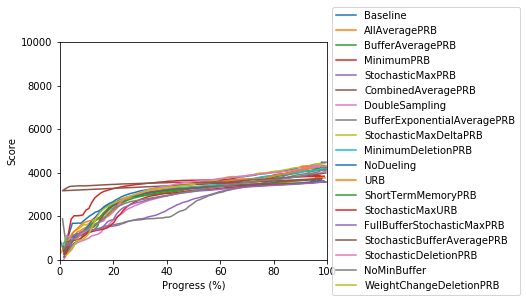

In [12]:
compare_scores(tag_to_name.values())

/home/rlee/anaconda3/envs/paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


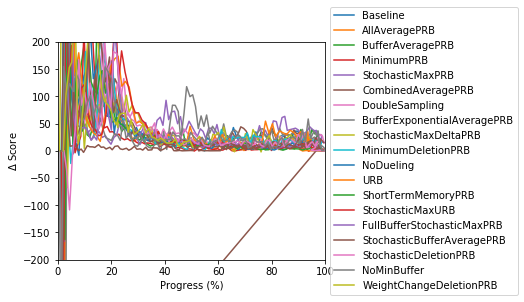

In [13]:
compare_delta_scores(tag_to_name.values())

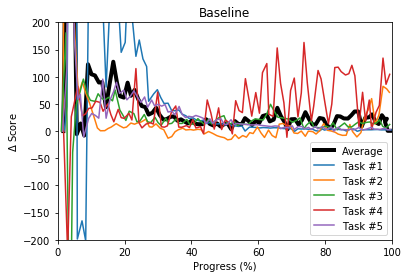

In [14]:
plot_delta_scores('Baseline', show=True)

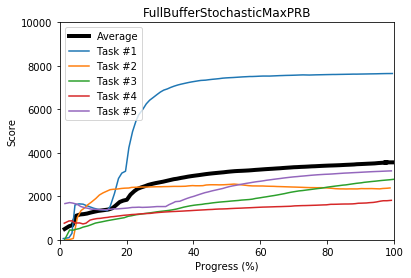

In [15]:
plot_scores('FullBufferStochasticMaxPRB', show=True)

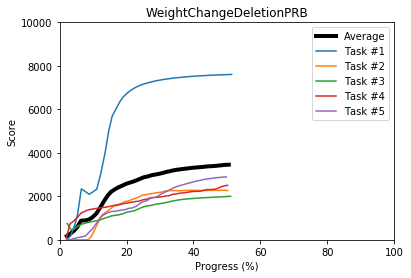

In [16]:
plot_scores('WeightChangeDeletionPRB', show=True)

/home/rlee/anaconda3/envs/paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


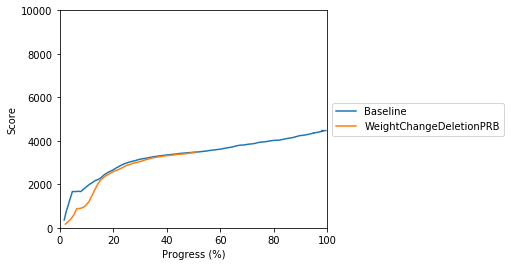

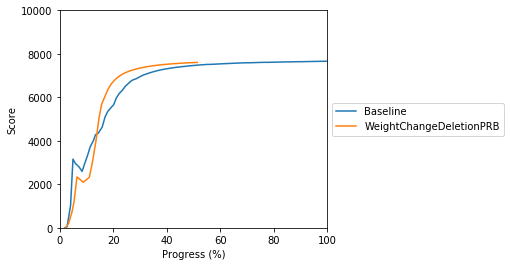

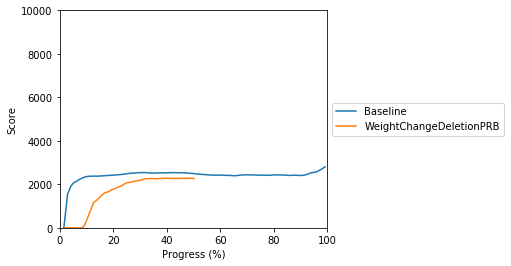

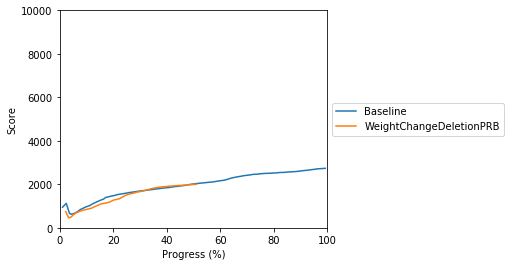

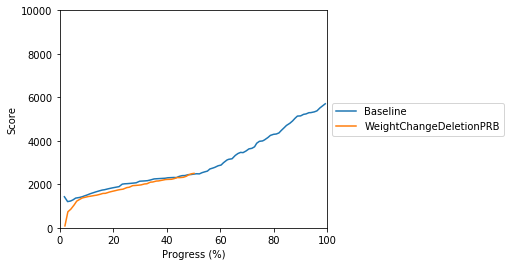

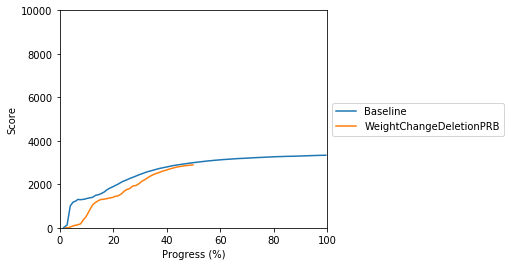

In [17]:
compare_scores(['Baseline', 'WeightChangeDeletionPRB'])
compare_scores(['Baseline', 'WeightChangeDeletionPRB'], task=1)
compare_scores(['Baseline', 'WeightChangeDeletionPRB'], task=2)
compare_scores(['Baseline', 'WeightChangeDeletionPRB'], task=3)
compare_scores(['Baseline', 'WeightChangeDeletionPRB'], task=4)
compare_scores(['Baseline', 'WeightChangeDeletionPRB'], task=5)